In [87]:
import pandas as pd

csv_url = "https://drive.google.com/uc?id=1PMzICMaWtnW2WssDhjcFCG2ic3_Ul3Qw" #для завантаження
# csv_url = "https://drive.google.com/file/d/1PMzICMaWtnW2WssDhjcFCG2ic3_Ul3Qw/view?usp=sharing" для перегляду

df = pd.read_csv(csv_url, header=0)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

**Відповідь**

In [5]:
rows_count = len(df)
print (f"{rows_count} книг зберігає дані датасет")


550 книг зберігає дані датасет


In [90]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


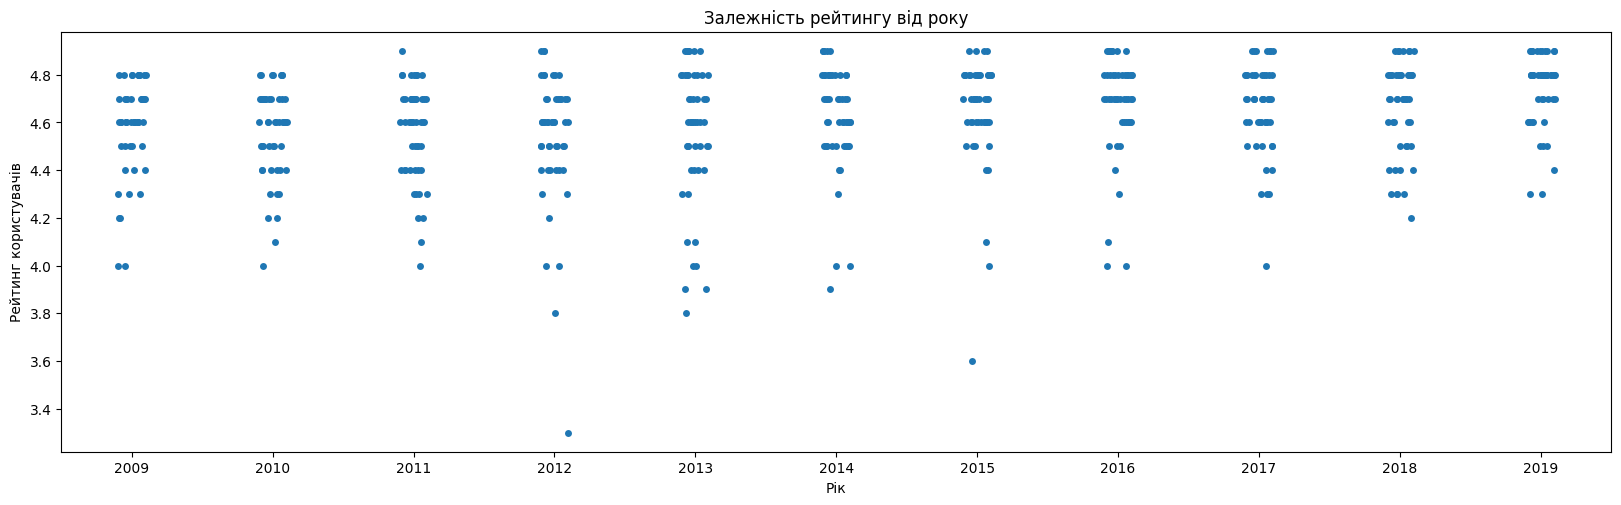

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))

plt.subplot(2, 1, 1)
sns.stripplot(x='year', y='user_rating', data=df, size=5)
plt.title('Залежність рейтингу від року')
plt.xlabel('Рік')
plt.ylabel('Рейтинг користувачів')

plt.show()

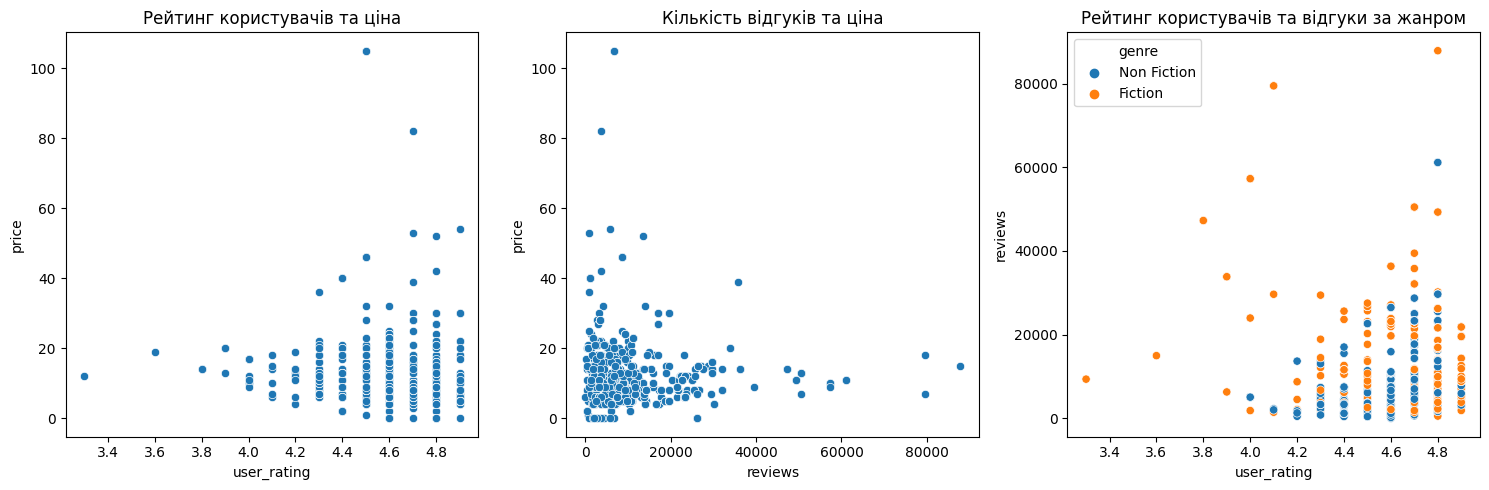

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='user_rating', y='price', data=df)
plt.title('Рейтинг користувачів та ціна')

plt.subplot(1, 3, 2)
sns.scatterplot(x='reviews', y='price', data=df)
plt.title('Кількість відгуків та ціна')

plt.subplot(1, 3, 3)
sns.scatterplot(x='user_rating', y='reviews', hue='genre', data=df)
plt.title('Рейтинг користувачів та відгуки за жанром')

plt.tight_layout()
plt.show()

In [ ]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

**Відповідь** Пропуски в таблиці відсутні. кількість пропусків (na) у кожному зі стовпців = 0

In [ ]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

**Відповідь** унікальних жанрів два: 'Non Fiction', 'Fiction'

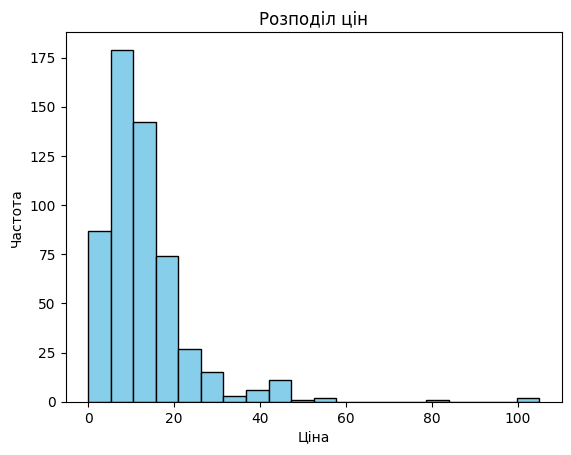

In [ ]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

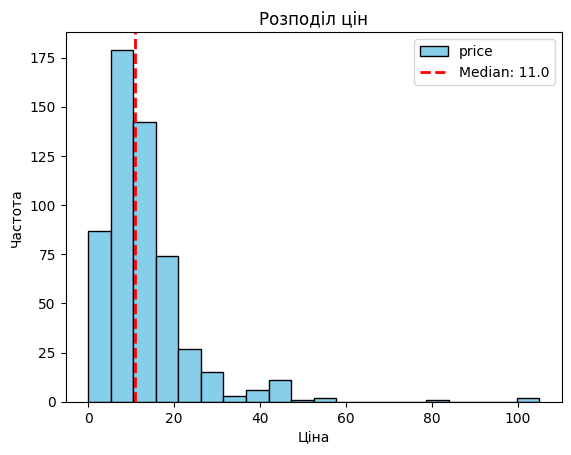

In [14]:
import matplotlib.pyplot as plt

df['price'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
median_price = df['price'].median()
plt.axvline(median_price, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_price}')

plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')

plt.legend()
plt.show()

In [ ]:
df['price'].max()

105

**Відповідь**: Максимальна ціна 105

In [ ]:
df['price'].min()

0

**Відповідь**: Мінімальна ціна 0

In [ ]:
df['price'].mean()

13.1

**Відповідь**: Середня ціна 13.1

In [ ]:
df['price'].median()

11.0

**Відповідь**: Медіанна ціна 11.0

In [ ]:
df['user_rating'].max()

4.9

**Відповідь**: Який рейтинг у датасеті найвищий? Відповідь: 4,9

In [ ]:
df[df['user_rating'] == df['user_rating'].max()].shape[0]

52

**Відповідь**: Скільки книг мають такий рейтинг? Відповідь: 52

In [ ]:
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


**Відповідь**: Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [ ]:
top_50_2015 = df[df['year'] == 2015].sort_values('user_rating', ascending=False)[:50]
top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


**Відповідь**: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychologic...

In [ ]:
top_50_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].sort_values('user_rating', ascending=False)[:50]
top_50_fiction_2010.shape[0]

20

**Відповідь**: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [ ]:
top_4_9 = df[df['user_rating'] == 4.9]

top_4_9_2010_2011 = top_4_9[top_4_9['year'].isin([2010, 2011])]
top_4_9_2010_2011.shape[0]

1

**Відповідь**: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [ ]:
cheap_books_2015 = df[(df['price'] < 8) & (df['year'] == 2015)]

cheap_books_2015 = cheap_books_2015.sort_values('price')
cheap_books_2015.iloc[-1, :]

name           Old School (Diary of a Wimpy Kid #10)
author                                   Jeff Kinney
user_rating                                      4.8
reviews                                         6169
price                                              7
year                                            2015
genre                                        Fiction
Name: 253, dtype: object

**Відповідь**: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [ ]:
genre_price_stats = df.groupby('genre')['price'].agg(['min', 'max']).reset_index()

genre_price_stats


,genre,min,max
0,Fiction,0,82
1,Non Fiction,0,105


**Відповідь**: Максимальна ціна для жанру Fiction: 82

**Відповідь**: Мінімальна ціна для жанру Fiction: 0

**Відповідь**: Максимальна ціна для жанру Non Fiction: 105

**Відповідь**: Мінімальна ціна для жанру Non Fiction: 0

In [ ]:
author_book_count = df.groupby('author')['name'].count().reset_index()
author_book_count.columns = ['author', 'book_count']

author_book_count

,author,book_count
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3


In [ ]:
author_book_count.shape

(248, 2)

**Відповідь**: Якої розмірності вийшла таблиця? Відповідь: 248, 2

In [ ]:
author_most_books = author_book_count.loc[author_book_count['book_count'].idxmax()]
author_most_books['author']

'Jeff Kinney'

**Відповідь**: Який автор має найбільше книг? Відповідь: Jeff Kinney

In [ ]:
num_books_by_author = author_most_books['book_count']
num_books_by_author

12

**Відповідь**: Скільки книг цього автора? Відповідь: 12

In [ ]:
author_avg_rating = df.groupby('author')['user_rating'].agg(['mean']).reset_index()
author_avg_rating.head()


,author,mean
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8
3,Adir Levy,4.8
4,Admiral William H. McRaven,4.7


In [ ]:
min_avg_author = author_avg_rating.loc[author_avg_rating['mean'].idxmin()]
min_avg_author['author']

'Donna Tartt'

**Відповідь**: У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

In [ ]:
min_avg_author['mean']

3.9

**Відповідь**: Який у цього автора середній рейтинг? Відповідь: 3.9

In [ ]:
merged_df = pd.concat([author_book_count, author_avg_rating], axis=1)
merged_df.round(1)


,author,book_count,author,mean
0,Abraham Verghese,2,Abraham Verghese,4.6
1,Adam Gasiewski,1,Adam Gasiewski,4.4
2,Adam Mansbach,1,Adam Mansbach,4.8
3,Adir Levy,1,Adir Levy,4.8
4,Admiral William H. McRaven,1,Admiral William H. McRaven,4.7
...,...,...,...,...
243,Walter Isaacson,3,Walter Isaacson,4.6
244,William Davis,2,William Davis,4.4
245,William P. Young,2,William P. Young,4.6
246,Wizards RPG Team,3,Wizards RPG Team,4.8


In [ ]:
sorted_df = merged_df.sort_values(by=['book_count', 'mean'], ascending=[True, True])
sorted_df


,author,book_count,author,mean
171,Muriel Barbery,1,Muriel Barbery,4.000000
43,Chris Cleave,1,Chris Cleave,4.100000
109,Ian K. Smith M.D.,1,Ian K. Smith M.D.,4.100000
186,Pierre Dukan,1,Pierre Dukan,4.100000
81,Elizabeth Strout,1,Elizabeth Strout,4.200000
...,...,...,...,...
11,American Psychological Association,10,American Psychological Association,4.500000
226,Suzanne Collins,11,Suzanne Collins,4.663636
92,Gary Chapman,11,Gary Chapman,4.736364
197,Rick Riordan,11,Rick Riordan,4.772727


**Відповідь**: Muriel Barbery перший у списку

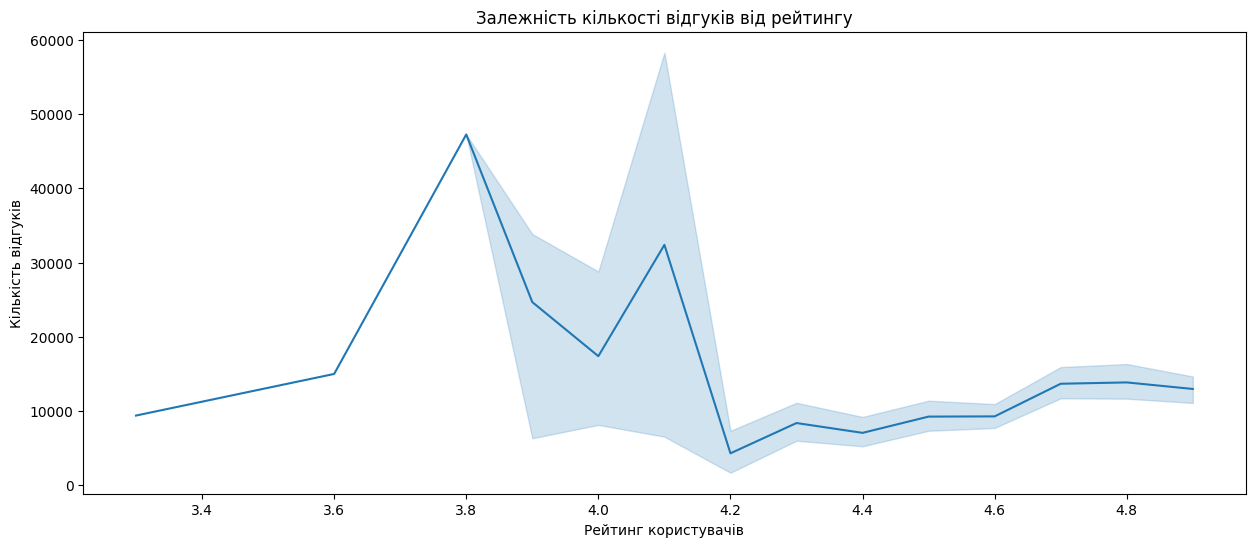

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

csv_url = "https://drive.google.com/uc?id=1PMzICMaWtnW2WssDhjcFCG2ic3_Ul3Qw"
df = pd.read_csv(csv_url, header=0)
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

plt.figure(figsize=(15, 6))
sns.lineplot(x="user_rating", y="reviews", data=df)
# plt.xticks(range(0, 0, 0))

plt.title('Залежність кількості відгуків від рейтингу')
plt.ylabel('Кількість відгуків')
plt.xlabel('Рейтинг користувачів')

plt.show()

массмаркет має більше відгуків ніж книжки з високою оцінкою.

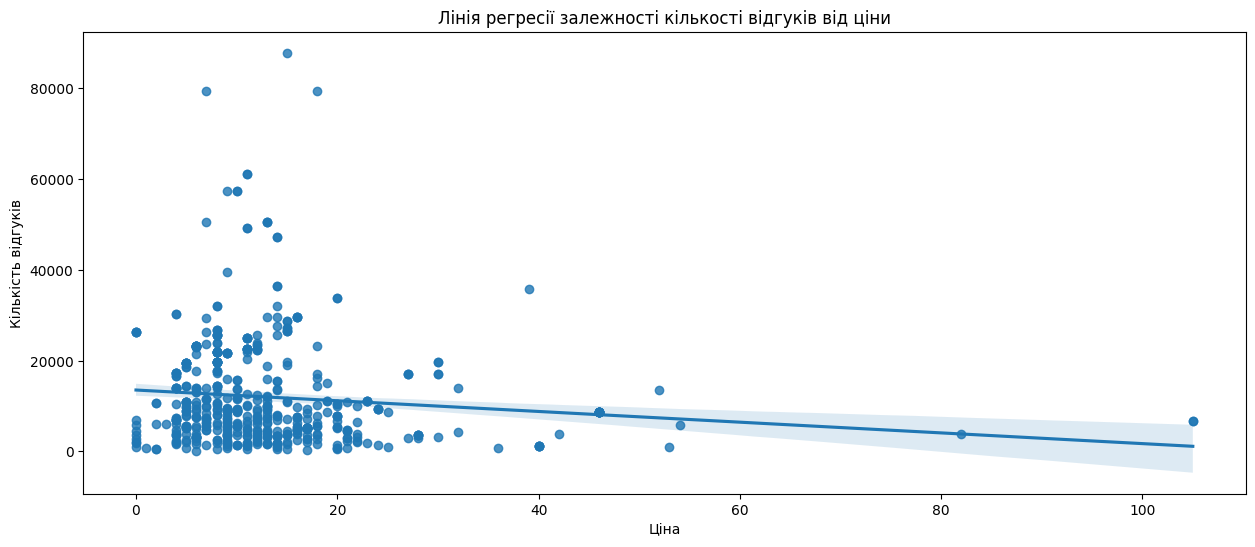

In [102]:
plt.figure(figsize=(15, 6))
sns.regplot(x="price", y="reviews", data=df)
# plt.xticks(range(0, 0, 0))

plt.title('Лінія регресії залежності кількості відгуків від ціни')
plt.ylabel('Кількість відгуків')
plt.xlabel('Ціна')

plt.show()


Зростання ціни на книжку призводить до зниження відгуків у майбутньому.

1. фактор купівельної спроможності
2. сегмент зайнятих покупців